# project Data Mining

# Réalisé par : Nidhal Hazbri 3DNI2

## Objectifs :
    • Maitriser l’API de twitter pour l’extraction des tweets
    • Maitriser la partie NLP (natural language processing) avec NLTK en Python
    • Appliquer les principes de nettoyage des données
    • Classer les tweets : regrouper ensemble les tweets qui sont similaires. C’est une étape qui peutêtre considérée comme une étape 

## Specifications
lmaginons que vous avez un compte Twitter, et que vous lez suivre les tweets sur ce reseau social. Vu le nombre colossal de Tweets, et faute de temps, vous n'avez pas la possibilite de les lire tous. Pour cela, vous avez besoin d'une application qui va jouer le role d'assistantet qui va
vous effectuer un resume de toutes ces informations. Une des approches qu'on peut utiliser estde le classer sous former de groupes de sorte a ce qu'on presente a l'utilisateur un seul Tweet de
chaque groupe. Pour cela, on doit proceder en trois grandes etapes :


## Travail faire
On a Telecharger les tweets a partir de Twitter en utilisant l'API de twitter. Pour cela, vous devriez un compte « Twitter Developper ». Pour cela, vous devriez telecharger au moins 10 mille twwets. Pour la documentation de l'API de twitter, vous pouvez consulter les liens suivants :


In [1]:
import pandas as pd
import tweepy
consumer_key="LHZVzcEN30hfmN2cPBqkoB3wq"
consumer_secret="DGZ7gQFDlqXoPfmAUWHOsY2eMTA0qhgKVb3rbExcx8Vhav3x3a"
access_token="1325046107437752325-a2zNm36NnzJqTFBFkIagjzpkdCadjs"
access_token_secret="7ohQJ7WTf2DuHsr9NNwPkOPXq5zUkaycrzo2nPhPUoGLL"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [2]:
twitter_data_analysis = pd.DataFrame(columns = ['text'])
tweets = tweepy.Cursor(api. user_timeline , id="twitter").items( 15000)

# Iterate and print tweets
i=0
for tweet in tweets:
    twitter_data_analysis.loc[i,"text"] = tweet.text
    i+=1
    
    

In [3]:
import csv
twitter_data_analysis.to_csv('twitter_data_analysis.csv',index = False)
twitter_data_analysis.head(10)

,text
0,RT @shesooosaddity: if you had a twitter befor...
1,@CloudNaii 40404
2,@issahairplug drink water replaced good morning
3,@Ne_ThatGuy we're taking oomf to the Fleets
4,"@_JusJust_ remember ""I dedicate my 500th Tweet..."
5,@ambr_ncole they're tourists
6,@PhallonXOXO proof you're doing it right 😌
7,some of you hating...\n\nbut we see you Fleeti...
8,That thing you didn’t Tweet but wanted to but ...
9,@quakerraina this is art


In [4]:
twitter_data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3218 entries, 0 to 3217
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3218 non-null   object
dtypes: object(1)
memory usage: 210.3+ KB


## Pretraitement des tweets
Dans cette etape, l'objectif est d'eliminer le texte inutile des tweets tels que les #, les noms des utilisateurs, les url,emoji ...


In [5]:
import re
for index, row in twitter_data_analysis.iterrows():
    err = row['text']
    new0 = re.sub(r"http\S+", "", err)
    new1 = re.sub(r"#\S+", "", new0)
    new2 = re.sub(r"@\S+", "", new1)
    new3 = re.sub(r"\n+", "", new2)
    new4 = re.sub(r"RT+", "", new3)
    new5 = re.sub("\d+", '', new4)
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    new6 = re.sub(emoji_pattern, "", new5)
    twitter_data_analysis.loc[index,'text'] =new6
    
    

In [6]:
twitter_data_analysis.head(40)

,text
0,if you had a twitter before rt this
1,
2,drink water replaced good morning
3,we're taking oomf to the Fleets
4,"remember ""I dedicate my th Tweet to:____"""
5,they're tourists
6,proof you're doing it right
7,some of you hating...but we see you Fleeting
8,That thing you didn’t Tweet but wanted to but ...
9,this is art


In [7]:
twitter_data_analysis.to_csv('clining_twitter_data_analysis.csv',index = False)


In [8]:
import nltk 
nltk.download('stopwords' )

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nidhal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Traitement des tweets: NLP (Natural LanguageProcessing)
On doit proceder a !'analyse du tweet en respectant les differentes etapes du NLP (Natural LanguageProcessing). La bibliotheque a utiliser est NLTK en Python.


In [9]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer() 
stemed_dataset=[]
for i in range(0,twitter_data_analysis.shape[0]):
    stemmed_array=twitter_data_analysis['text'][i].split()
    stemmed=[ps.stem(word) for word in stemmed_array if not word in set(stopwords.words('english'))]
    stemmed=' '.join(stemmed)
    stemed_dataset.append(stemmed)
print(stemed_dataset[0:10])

['twitter rt', '', 'drink water replac good morn', "we'r take oomf fleet", 'rememb "I dedic th tweet to:____"', "they'r tourist", 'proof right', 'hating...but see fleet', 'that thing didn’t tweet want didn’t got close like nah. We place for…', 'art']


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(stemed_dataset)
print(X)

  (0, 2505)	1
  (0, 1977)	1
  (2, 683)	1
  (2, 2609)	1
  (2, 1915)	1
  (2, 985)	1
  (2, 1517)	1
  (3, 2619)	1
  (3, 2312)	1
  (3, 1638)	1
  (3, 875)	1
  (4, 1908)	1
  (4, 589)	1
  (4, 2352)	1
  (4, 2495)	1
  (4, 2413)	1
  (4, 0)	1
  (5, 2368)	1
  (5, 2442)	1
  (6, 1820)	1
  (6, 1947)	1
  (7, 875)	1
  (7, 1061)	1
  (7, 321)	1
  (7, 2035)	1
  :	:
  (3212, 1362)	1
  (3212, 159)	1
  (3212, 1626)	1
  (3212, 453)	1
  (3213, 286)	1
  (3213, 2374)	1
  (3213, 1263)	1
  (3213, 118)	1
  (3214, 2619)	1
  (3214, 896)	1
  (3214, 1362)	1
  (3214, 2507)	1
  (3214, 59)	1
  (3214, 2657)	1
  (3214, 452)	1
  (3215, 992)	1
  (3215, 1097)	1
  (3215, 821)	1
  (3216, 366)	1
  (3217, 985)	2
  (3217, 1517)	1
  (3217, 2495)	1
  (3217, 1577)	1
  (3217, 80)	1
  (3217, 1026)	1


## Classification des tweets
Etant donne un ensemble de tweets, l'objectif est de les resumer sous formes de groupes de sorte
a ce que les Tweets qui sont dans le meme groupe soient similaires. Ainsi, l'utilisateur pourra par la suite lire juste un Tweet de chaque groupe (le Tweet qui est le centro"ide de groupes).
on a Utiliser l'algorithme K-Means pour classer les Tweets en k classes ,valeurs de k allant de 1 a30 par exemple).


In [11]:
from sklearn.cluster import KMeans
wcss=[]

In [12]:
for i in range(1,30):
    Kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

Initialization complete
Iteration  0, inertia 17716.000
Iteration  1, inertia 11162.111
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 14494.000
Iteration  1, inertia 11162.111
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 17580.000
Iteration  1, inertia 11162.111
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 20924.000
Iteration  1, inertia 11162.111
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 20802.000
Iteration  1, inertia 11162.111
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 39816.000
Iteration  1, inertia 11162.111
Converged at iteration 1: center shift 0.000000e+00 within tol

Iteration  3, inertia 11048.849
Iteration  4, inertia 10823.584
Iteration  5, inertia 10755.203
Iteration  6, inertia 10749.134
Iteration  7, inertia 10748.668
Converged at iteration 7: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 17438.000
Iteration  1, inertia 11011.669
Iteration  2, inertia 10998.082
Iteration  3, inertia 10902.518
Iteration  4, inertia 10737.786
Iteration  5, inertia 10726.431
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 11260.000
Iteration  1, inertia 11121.054
Iteration  2, inertia 11077.516
Iteration  3, inertia 10956.790
Iteration  4, inertia 10882.226
Converged at iteration 4: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 11248.000
Iteration  1, inertia 10928.697
Iteration  2, inertia 10828.138
Iteration  3, inertia 10765.483
Iteration  4, inertia 10763.711
Converged 

Converged at iteration 3: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 10863.000
Iteration  1, inertia 10568.337
Iteration  2, inertia 10550.310
Converged at iteration 2: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 10855.000
Iteration  1, inertia 10739.428
Iteration  2, inertia 10734.355
Converged at iteration 2: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 11098.000
Iteration  1, inertia 10875.754
Iteration  2, inertia 10759.094
Iteration  3, inertia 10756.051
Converged at iteration 3: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 13812.000
Iteration  1, inertia 10685.330
Iteration  2, inertia 10681.420
Iteration  3, inertia 10680.787
Converged at iteration 3: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 

Initialization complete
Iteration  0, inertia 10756.000
Iteration  1, inertia 10524.024
Iteration  2, inertia 10404.339
Iteration  3, inertia 10397.068
Converged at iteration 3: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 13729.000
Iteration  1, inertia 10606.071
Iteration  2, inertia 10599.234
Iteration  3, inertia 10598.282
Converged at iteration 3: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 14118.000
Iteration  1, inertia 10617.589
Iteration  2, inertia 10393.635
Iteration  3, inertia 10310.006
Iteration  4, inertia 10235.661
Iteration  5, inertia 10231.820
Iteration  6, inertia 10231.620
Converged at iteration 6: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 11117.000
Iteration  1, inertia 10664.408
Iteration  2, inertia 10602.591
Iteration  3, inertia 10599.290
Iteration  4, inertia 10598.691
Converged at itera

Iteration  1, inertia 10409.912
Iteration  2, inertia 10194.200
Iteration  3, inertia 10076.750
Iteration  4, inertia 10027.224
Iteration  5, inertia 10026.548
Iteration  6, inertia 10026.347
Converged at iteration 6: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 11070.000
Iteration  1, inertia 10612.318
Iteration  2, inertia 10552.422
Iteration  3, inertia 10549.361
Iteration  4, inertia 10548.762
Converged at iteration 4: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 10739.000
Iteration  1, inertia 10530.065
Iteration  2, inertia 10516.683
Iteration  3, inertia 10502.278
Iteration  4, inertia 10483.115
Iteration  5, inertia 10439.628
Iteration  6, inertia 10435.558
Converged at iteration 6: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 10835.000
Iteration  1, inertia 10473.900
Iteration  2, inertia 10433.407
Iteration 

Iteration  5, inertia 10246.514
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 13201.000
Iteration  1, inertia 10149.157
Iteration  2, inertia 10138.762
Iteration  3, inertia 10137.360
Converged at iteration 3: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 13472.000
Iteration  1, inertia 10157.523
Iteration  2, inertia 9961.303
Iteration  3, inertia 9859.906
Iteration  4, inertia 9803.414
Iteration  5, inertia 9802.778
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 10736.000
Iteration  1, inertia 10383.876
Iteration  2, inertia 10326.974
Iteration  3, inertia 10323.913
Iteration  4, inertia 10323.314
Converged at iteration 4: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 10659.000
Iteration  1, inertia 10457.949
Iter

Iteration  3, inertia 10277.142
Converged at iteration 3: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 10649.000
Iteration  1, inertia 10334.036
Iteration  2, inertia 10112.077
Iteration  3, inertia 10079.711
Iteration  4, inertia 10039.436
Iteration  5, inertia 10033.836
Iteration  6, inertia 10017.970
Iteration  7, inertia 10017.886
Converged at iteration 7: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 10555.000
Iteration  1, inertia 10352.932
Iteration  2, inertia 10190.568
Iteration  3, inertia 10056.610
Iteration  4, inertia 10055.405
Converged at iteration 4: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 10633.000
Iteration  1, inertia 10375.791
Iteration  2, inertia 10176.134
Iteration  3, inertia 10101.064
Iteration  4, inertia 10098.898
Iteration  5, inertia 10098.804
Converged at iteration 5: center shift 0.0

Iteration  6, inertia 10125.345
Iteration  7, inertia 10124.305
Iteration  8, inertia 10124.175
Converged at iteration 8: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 10627.000
Iteration  1, inertia 10047.003
Iteration  2, inertia 9974.413
Iteration  3, inertia 9943.343
Iteration  4, inertia 9942.443
Iteration  5, inertia 9940.944
Iteration  6, inertia 9940.190
Converged at iteration 6: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 10506.000
Iteration  1, inertia 10310.138
Iteration  2, inertia 10271.013
Iteration  3, inertia 10187.365
Iteration  4, inertia 10128.871
Iteration  5, inertia 9977.817
Iteration  6, inertia 9977.638
Converged at iteration 6: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 10670.000
Iteration  1, inertia 10361.947
Iteration  2, inertia 10272.135
Iteration  3, inertia 10061.109
Iteration  4, ine

Iteration  2, inertia 10096.554
Iteration  3, inertia 9924.190
Iteration  4, inertia 9799.973
Iteration  5, inertia 9798.446
Iteration  6, inertia 9798.353
Iteration  7, inertia 9798.255
Iteration  8, inertia 9797.581
Iteration  9, inertia 9796.935
Iteration 10, inertia 9796.738
Converged at iteration 10: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 10630.000
Iteration  1, inertia 10257.709
Iteration  2, inertia 10209.080
Iteration  3, inertia 10145.069
Iteration  4, inertia 10135.133
Iteration  5, inertia 10094.251
Iteration  6, inertia 10059.956
Iteration  7, inertia 10058.565
Converged at iteration 7: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 10577.000
Iteration  1, inertia 9959.986
Iteration  2, inertia 9882.789
Iteration  3, inertia 9852.267
Iteration  4, inertia 9851.868
Iteration  5, inertia 9851.272
Iteration  6, inertia 9851.225
Converged at iteration 6: center 

Iteration  3, inertia 9803.401
Iteration  4, inertia 9803.302
Converged at iteration 4: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 10575.000
Iteration  1, inertia 9794.451
Iteration  2, inertia 9755.766
Iteration  3, inertia 9754.697
Iteration  4, inertia 9754.495
Converged at iteration 4: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 10531.000
Iteration  1, inertia 9938.278
Iteration  2, inertia 9848.038
Iteration  3, inertia 9799.369
Iteration  4, inertia 9709.109
Iteration  5, inertia 9708.341
Iteration  6, inertia 9708.255
Converged at iteration 6: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 10560.000
Iteration  1, inertia 10284.475
Iteration  2, inertia 10279.791
Converged at iteration 2: center shift 0.000000e+00 within tolerance 1.263624e-07
Initialization complete
Iteration  0, inertia 10514.000
Iteration  1

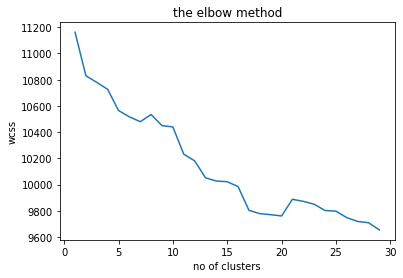

In [13]:

import matplotlib.pyplot as plt
plt.plot(range(1,30),wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [14]:
true_k=30
Kmeans=KMeans(n_clusters=true_k,init='k-means++',n_init=1)
Kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##### La cellule suivante contient les mots cles de chaque cluster

In [15]:

print("Top terms per cluster:")
order_centroids = Kmeans.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()
print("\n")

Top terms per cluster:
Cluster 0:
 mode
 dark
 day
 that
 light
 car
 retweet
 effect
 modelik
 need

Cluster 1:
 antast
 ᵗᶦⁿʸ
 fourth
 french
 fren
 freestylin
 freeeezi
 freedom
 free
 freak

Cluster 2:
 wait
 not
 tweet
 go
 today
 do
 find
 like
 we
 can

Cluster 3:
 tweet
 twitter
 we
 you
 like
 us
 it
 one
 get
 that

Cluster 4:
 gt
 tweet
 sation
 you
 share
 shrek
 decemb
 in
 ver
 flight

Cluster 5:
 tweet
 know
 time
 music
 wait
 listen
 ᵗᶦⁿʸ
 fren
 freestylin
 freeeezi

Cluster 6:
 could
 we
 if
 voice
 speed
 cher
 up
 way
 find
 time

Cluster 7:
 love
 us
 we
 follow
 gratitude
 dm
 share
 you
 much
 thank

Cluster 8:
 minut
 one
 tweet
 gone
 wake
 fourth
 freestylin
 freeeezi
 freedom
 free

Cluster 9:
 tweet
 twitter
 see
 ios
 octob
 there
 retweet
 peopl
 rd
 read

Cluster 10:
 dm
 treat
 sweet
 amp
 comin
 way
 atcha
 these
 and
 head

Cluster 11:
 new
 just
 profil
 show
 ju
 wanna
 follow
 follower
 we
 today

Cluster 12:
 take
 come
 track
 alway
 fast
 sweet
 f

On a choisir un Tweet par classe comme representant. Les tweets choisis seront les resumes de toutes les informations contenues dans les tweets.

In [16]:
result_final_twitter_data_analysis = pd.DataFrame(columns = [ 'text'])
i=0
j=0
while i<30:
    while True: 
        Y=cv.transform([stemed_dataset[j]])
        prediction=Kmeans.predict(Y)
        if i == prediction:
            print("tweet of cluster "+str(prediction)+twitter_data_analysis.loc[i,"text"])
            result_final_twitter_data_analysis.loc[i,"text"] =twitter_data_analysis.loc[i,"text"]
            j=0
            break
        j+=1
    i+=1
result_final_twitter_data_analysis.to_csv('result_final_twitter_data_analysis.csv',index = False )

tweet of cluster [0]  if you had a twitter before  rt this
tweet of cluster [1] 
tweet of cluster [2] drink water replaced good morning
tweet of cluster [3] we're taking oomf to the Fleets
tweet of cluster [4] remember "I dedicate my th Tweet to:____"
tweet of cluster [5] they're tourists
tweet of cluster [6] proof you're doing it right 
tweet of cluster [7]some of you hating...but we see you Fleeting 
tweet of cluster [8]That thing you didn’t Tweet but wanted to but didn’t but got so close but then were like nah. We have a place for… 
tweet of cluster [9] this is art
tweet of cluster [10] aren't we all six feet
tweet of cluster [11] this Tweet just graduated with honors
tweet of cluster [12] saw it, love it, can't wait for the wedding pics 
tweet of cluster [13]  
tweet of cluster [14]breathe
tweet of cluster [15] apology accepted
tweet of cluster [16] H
tweet of cluster [17] THIRSTY
tweet of cluster [18] looking hydrated
tweet of cluster [19] the moon will share
tweet of cluster [20]

## conclusion :

#### on a charge les tweets d'apres l'api de twitter, on les a mis dans le fichier csv twitter_data_analysis. puis on a fait le data cleaning et on a mis le resultat dans le fichier cleaning_twitter_data_analysis.csv.Et enfin on a mis un tweet de chaque cluster dans le fichier result_final_twitter_data_analysis.



# [lien ghithub](https://github.com/hazbri/projectDataMining/)